In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

# Evaluation techniques

* Imputations are used to improve model performance
* Imputation with maximum machine learning model performance is selected
* Density plots explain the distribution in the data to check bias in the imputations

In [ ]:
df = pd.read_csv("/content/diabetes.csv")

In [ ]:
df.isnull().mean()*100

Pregnant              0.000000
Glucose               0.651042
Diastolic_BP          4.557292
Skin_Fold            29.557292
Serum_Insulin        48.697917
BMI                   1.432292
Diabetes_Pedigree     0.000000
Age                   0.000000
Class                 0.000000
dtype: float64

In [ ]:
import statsmodels.api as sm

df_cc = df.dropna(how="any") # drop any row where there is a missing value --> baseline model
X = sm.add_constant(df_cc.iloc[:,:-1]) # excluding target columns "Class"
y = df_cc["Class"]
lm = sm.OLS(y, X).fit()

In [ ]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Class   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     25.30
Date:                Sat, 24 Apr 2021   Prob (F-statistic):           2.65e-31
Time:                        13:43:01   Log-Likelihood:                -177.76
No. Observations:                 392   AIC:                             373.5
Df Residuals:                     383   BIC:                             409.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.1027      0.144     -7.681      0.000      -1.385      -0.820
Pregnant              0.0130      0.008      1.549      0.122      -0.003       0.029
Glucose               0.0064      0.001      7.855      0.000       0.005       0.008
Diastolic_BP       5.465e-05      0.002      0.032      0.975      -0.003       0.003
Skin_Fold             0.0017      0.003      0.665      0.506      -0.003       0.007
Serum_Insulin        -0.0001      0.000     -0.603      0.547      -0.001       0.000
BMI                   0.0093      0.004      2.391      0.017       0.002       0.017
Diabetes_Pedigree     0.1572      0.058      2.708      0.007       0.043       0.271
Age                   0.0059      0.003      2.109      0.036       0.000       0.011
==============================================================================
Omnibus:                        9.511   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.387
Skew:                           0.344   Prob(JB):                      0.00916
Kurtosis:                       2.682   Cond. No.                     1.77e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
lm.rsquared_adj

0.33210805003287613

In [ ]:
lm.params

const               -1.102677
Pregnant             0.012953
Glucose              0.006409
Diastolic_BP         0.000055
Skin_Fold            0.001678
Serum_Insulin       -0.000123
BMI                  0.009325
Diabetes_Pedigree    0.157192
Age                  0.005878
dtype: float64

In [ ]:
# Mean Imputation
from sklearn.impute import SimpleImputer

df_mean = df.copy(deep=True)
mean_imputer = SimpleImputer(strategy="mean")
df_mean.iloc[:, :] = mean_imputer.fit_transform(df_mean)

X = sm.add_constant(df_mean.iloc[:, :-1])
y = df["Class"]
lm_mean = sm.OLS(y, X).fit()

# KNN Imputation
from fancyimpute import KNN
knn_imputer = KNN()

df_knn = df.copy(deep=True)
df_knn.iloc[:,:]= knn_imputer.fit_transform(df_knn)
X = sm.add_constant(df_knn.iloc[:, :-1])
lm_KNN = sm.OLS(y, X).fit()

# MICE Imputation
from fancyimpute import IterativeImputer
MICE_imputer = IterativeImputer()

df_MICE = df.copy(deep=True)
df_MICE.iloc[:,:] = MICE_imputer.fit_transform(df_MICE)
X = sm.add_constant(df_MICE.iloc[:, :-1])
lm_MICE = sm.OLS(y, X).fit()

Imputing row 1/768 with 1 missing, elapsed time: 0.156
Imputing row 101/768 with 2 missing, elapsed time: 0.160
Imputing row 201/768 with 1 missing, elapsed time: 0.162
Imputing row 301/768 with 3 missing, elapsed time: 0.165
Imputing row 401/768 with 2 missing, elapsed time: 0.168
Imputing row 501/768 with 0 missing, elapsed time: 0.171
Imputing row 601/768 with 1 missing, elapsed time: 0.173
Imputing row 701/768 with 0 missing, elapsed time: 0.176


In [ ]:
# Compare all the R-squared of different imputations

print(pd.DataFrame({"Complete": lm.rsquared_adj,
                    "Mean Imp.": lm_mean.rsquared_adj,
                    "KNN Imp.": lm_KNN.rsquared_adj,
                    "MICE Imp.": lm_MICE.rsquared_adj},
                   index=["R_squared_adj"]))

               Complete  Mean Imp.  KNN Imp.  MICE Imp.
R_squared_adj  0.332108   0.313781  0.316505    0.31755


Text(0.5, 0, 'Skin Fold')

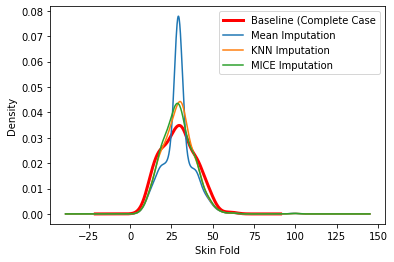

In [ ]:
# Comparing density plots

df_cc["Skin_Fold"].plot(kind="kde", c="red", linewidth=3)
df_mean["Skin_Fold"].plot(kind="kde")
df_knn["Skin_Fold"].plot(kind="kde")
df_MICE["Skin_Fold"].plot(kind="kde")

labels=["Baseline (Complete Case", "Mean Imputation", "KNN Imputation", "MICE Imputation"]

plt.legend(labels)
plt.xlabel("Skin Fold")

# Summary
* Mean imputation is totally out of shape
* MICE and KNN fits better to the data